# Q14: 22-Aug-2022

Consider 1200 samples and 2 features in your dataset. The synthetic data can be created from **sklearn.datasets** family using **make_blobs**.<br>

Let’s say, there are 3 range of clusters – 2, 3 and 4.
Using K-means clustering approach, find out the silhouette score for each of these clusters. Which one would you use as optimum value for no. of clusters for the K-means clustering?

In [1]:
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
import numpy as np
import pandas as pd

In [2]:
df, y, centres = make_blobs(n_samples=1200, n_features=2, centers=4, random_state=100, return_centers=True)

In [3]:
df = pd.DataFrame(data=df, columns=['X1', 'X2'])
#df.head(2)
#df
#centres

In [4]:
#sns.scatterplot(df['X1'],df['X2'])
#sns.scatterplot(data=df, x='X1', y='X2');

In [5]:
sse, slc = {}, {}
x=df
for k in range(2, 5):
    kmeans = KMeans(n_clusters = k, max_iter = 1000, n_init = 10, init = 'k-means++', random_state=123).fit(x)
    clusters = kmeans.labels_
    sse[k] = kmeans.inertia_
    slc[k] = silhouette_score(x, clusters)

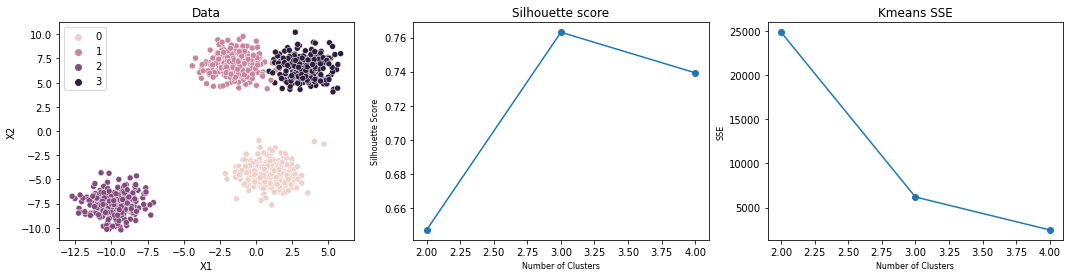

In [6]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(18,4), sharex=False, sharey=False)

# Visualize clusters
ax1.set_title('Data')
sns.scatterplot(data=df, x='X1', y='X2', hue=y, ax=ax1);

# Visualize Silhouette score
ax2.plot(list(slc.keys()), list(slc.values()), marker='o')
ax2.set_title('Silhouette score')
ax2.set_xlabel('Number of Clusters', fontsize=8)
ax2.set_ylabel('Silhouette Score', fontsize=8)

# Visaulize kmeans cluster
ax3.plot(list(sse.keys()), list(sse.values()), marker='o')
ax3.set_title('Kmeans SSE')
ax3.set_xlabel('Number of Clusters', fontsize=8)
ax3.set_ylabel('SSE', fontsize=8)
plt.show()

# Specify well distanced centers

In [7]:
centers= [(0,0), (10, 0), (0, 10), (10, 10)]
df, y, centres = make_blobs(n_samples=1200, n_features=2, centers=centers, random_state=1000, return_centers=True)
df = pd.DataFrame(data=df, columns=['X1', 'X2'])

In [8]:
sse, slc = {}, {}
x=df
for k in range(2, 5):
    kmeans = KMeans(n_clusters = k, max_iter = 1000, n_init = 10, init = 'k-means++', random_state=123).fit(x)
    clusters = kmeans.labels_
    sse[k] = kmeans.inertia_
    slc[k] = silhouette_score(x, clusters)

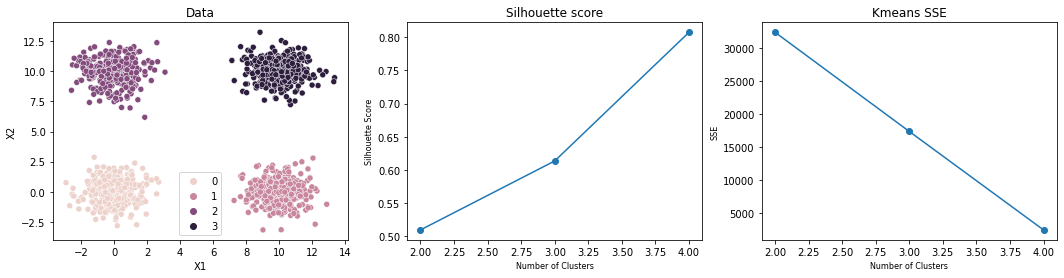

In [9]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(18,4), sharex=False, sharey=False)

# Visualize clusters
ax1.set_title('Data')
sns.scatterplot(data=df, x='X1', y='X2', hue=y, ax=ax1);

# Visualize Silhouette score
ax2.plot(list(slc.keys()), list(slc.values()), marker='o')
ax2.set_title('Silhouette score')
ax2.set_xlabel('Number of Clusters', fontsize=8)
ax2.set_ylabel('Silhouette Score', fontsize=8)

# Visaulize kmeans cluster
ax3.plot(list(sse.keys()), list(sse.values()), marker='o')
ax3.set_title('Kmeans SSE')
ax3.set_xlabel('Number of Clusters', fontsize=8)
ax3.set_ylabel('SSE', fontsize=8)
plt.show()

# Conclusion

If cluster canters are not well separated, then Silhouette score, is biased towards less number of clusters. Whereas kmeans SSE is always biased towards higher number of clusters, so with kmeans once must manually use elbow method to find number of clusters.

If clusters are well separated, then Silhouette score will give always give correct number of clusters.